In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
def normalizar(images):
    return images / 255.0

In [27]:
# Paso 1: Cargar y preprocesar los datos de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

#Normalizo las imagenes 
train_images = normalizar(train_images)
test_images = normalizar(test_images)
# print(f'Training data shape: {train_labels}')
# print(f'Training data shape: {train_images.shape}')
# print(f'Testing data shape: {test_images.shape}')

In [28]:
#Crear el modelo de la CNN
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),strides=(1,1), padding='same' ,activation='relu', input_shape=(28, 28, 1)),
    #same : sin relleno same: Padding para mantener dimensionalidad
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'),
    #Aumento filtros para aprovechar la capacidad de la red de aprender mejores caracteristicas
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'),
    #En cada epoca la % de que las neuronas 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same' , activation='relu'),
    #Aplana la entrada (vector unidimensional)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    #Numero de clases capa de salida
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\ariel\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nPooling\nayuda a reducir la dimension de las entradas (imagenes), ayuda a controlar el sobreajuste ademas de que hace a la red eficiente\n\n'

<h2>Compilar el modelo</h2>

In [29]:
"""
SGD (Stochastic Gradient Descent): Un optimizador básico que actualiza los pesos utilizando la regla del gradiente descendente.
Adam (Adaptive Moment Estimation): Un optimizador avanzado que ajusta las tasas de aprendizaje para cada parámetro.
"""
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

<h2>Entrenar el modelo</h2>

In [30]:
# Reajustar las dimensiones de los datos de entrenamiento y prueba
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8241 - loss: 0.4855 - val_accuracy: 0.9038 - val_loss: 0.2642
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9154 - loss: 0.2297 - val_accuracy: 0.9139 - val_loss: 0.2370
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9359 - loss: 0.1753 - val_accuracy: 0.9231 - val_loss: 0.2156
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9508 - loss: 0.1336 - val_accuracy: 0.9186 - val_loss: 0.2421
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9627 - loss: 0.0986 - val_accuracy: 0.9157 - val_loss: 0.2574
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9733 - loss: 0.0719 - val_accuracy: 0.9197 - val_loss: 0.3374
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9816 - loss: 0.0523 - val_accuracy: 0.9223 - val_loss: 0.3346
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9869 -

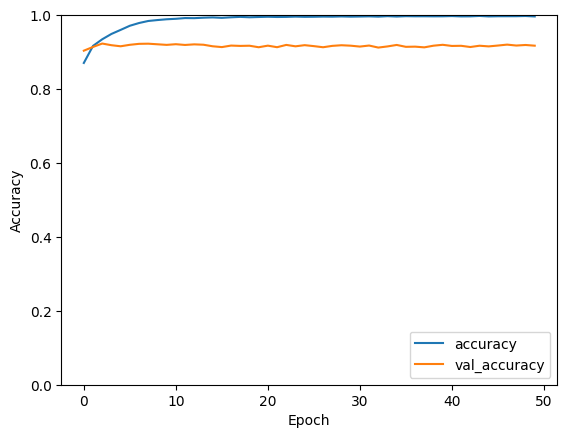

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [35]:
# model.save('proyectoFinal/model/mnist_model.h5')
model.save('D:/IAProyectos/ProyectoFinal_IA/models/mnist_model_mejorado.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'proyectoFinal/model/mnist_model.keras'